In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binary-classification/10_2024_09_03_3553.JPG
/kaggle/input/binary-classification/10_2024_09_03_3596.JPG
/kaggle/input/binary-classification/10_2024_09_03_3556.JPG
/kaggle/input/binary-classification/10_2024_09_03_3547.JPG
/kaggle/input/binary-classification/10_2024_09_03_3552.JPG
/kaggle/input/binary-classification/10_2024_09_03_3590.JPG
/kaggle/input/binary-classification/10_2024_09_03_3574.JPG
/kaggle/input/binary-classification/10_2024_09_03_3603.JPG
/kaggle/input/binary-classification/10_2024_09_03_3594.JPG
/kaggle/input/binary-classification/10_2024_09_03_3601.JPG
/kaggle/input/binary-classification/10_2024_09_03_3625.JPG
/kaggle/input/binary-classification/10_2024_09_03_3623.JPG
/kaggle/input/binary-classification/10_2024_09_03_3595.JPG
/kaggle/input/binary-classification/10_2024_09_03_3600.JPG
/kaggle/input/binary-classification/10_2024_09_03_3537.JPG
/kaggle/input/binary-classification/10_2024_09_03_3517.JPG
/kaggle/input/binary-classification/10_2024_09_03_3617.J

In [2]:
!pip install tensorflow keras numpy matplotlib


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
import os


In [4]:
import os
import shutil
import random
import cv2
import numpy as np
import imgaug.augmenters as iaa

# === Paths ===
dataset_8CB = "/kaggle/input/binary-class-8cb"
dataset_5CB = "/kaggle/input/binary-classification"
output_path = "/kaggle/working/binary-classification-dataset"

# === Categories ===
categories = {
    "8CB": dataset_8CB,
    "5CB": dataset_5CB
}

# === Split ratios ===
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# === Create directory structure ===
for split in ["train", "val", "test"]:
    for category in categories.keys():
        os.makedirs(os.path.join(output_path, split, category), exist_ok=True)

# === Define augmentation pipeline ===
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Affine(rotate=(-20, 20), scale=(0.8, 1.2)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),
    iaa.Multiply((0.8, 1.2)),
    iaa.GammaContrast((0.5, 1.5)),
    iaa.GaussianBlur(sigma=(0, 1.0)),
])

# === Split and augment ===
for category, source_folder in categories.items():
    images = [f for f in os.listdir(source_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    train_split = int(train_ratio * len(images))
    val_split = int(val_ratio * len(images))

    for i, img_name in enumerate(images):
        img_path = os.path.join(source_folder, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"❌ Skipping unreadable image: {img_name}")
            continue

        if i < train_split:
            split = "train"
        elif i < train_split + val_split:
            split = "val"
        else:
            split = "test"

        # Base filename
        base, ext = os.path.splitext(img_name)
        base_filename = f"{category}_{i}"

        # Save original image
        dst_dir = os.path.join(output_path, split, category)
        original_path = os.path.join(dst_dir, f"{base_filename}_orig.jpg")
        cv2.imwrite(original_path, img)

        # Generate and save 9 augmentations (total = 10 images per original)
        aug_images = augmenter(images=[img] * 9)
        for j, aug_img in enumerate(aug_images):
            aug_path = os.path.join(dst_dir, f"{base_filename}_aug{j+1}.jpg")
            cv2.imwrite(aug_path, aug_img)

        print(f"✅ {split.upper()} - {category} - {img_name} augmented")

print(f"\n🎉 Dataset split and augmented successfully at: {output_path}")


✅ TRAIN - 8CB - 27.0533.jpeg augmented
✅ TRAIN - 8CB - 32.0533.jpeg augmented
✅ TRAIN - 8CB - 22.3500.jpeg augmented
✅ TRAIN - 8CB - 22.5500.jpeg augmented
✅ TRAIN - 8CB - 29.0533.jpeg augmented
✅ TRAIN - 8CB - 22.8500.jpeg augmented
✅ TRAIN - 8CB - 27.1533.jpeg augmented
✅ TRAIN - 8CB - 37.7567.jpeg augmented
✅ TRAIN - 8CB - 32.7567.jpeg augmented
✅ TRAIN - 8CB - 22.7500.jpeg augmented
✅ TRAIN - 8CB - 37.4567.jpeg augmented
✅ TRAIN - 8CB - 37.1567.jpeg augmented
✅ TRAIN - 8CB - 25.5533.jpeg augmented
✅ TRAIN - 8CB - 23.1500.jpeg augmented
✅ TRAIN - 8CB - 37.0567.jpeg augmented
✅ TRAIN - 8CB - 29.8533.jpeg augmented
✅ TRAIN - 8CB - 23.0500.jpeg augmented
✅ TRAIN - 8CB - 37.0567 (1).jpeg augmented
✅ TRAIN - 8CB - 27.8533.jpeg augmented
✅ TRAIN - 8CB - 31.0533.jpeg augmented
✅ TRAIN - 8CB - 25.9533.jpeg augmented
✅ TRAIN - 8CB - 25.7533.jpeg augmented
✅ TRAIN - 8CB - 37.8567.jpeg augmented
✅ VAL - 8CB - 34.3567.jpeg augmented
✅ VAL - 8CB - 37.4567 (1).jpeg augmented
✅ VAL - 8CB - 30.5533

In [7]:
print("\n📁 Dataset Split Summary:")
for split in ["train", "val", "test"]:
    print(f"\n🔹 {split.upper()} SET")
    for category in categories.keys():
        folder_path = os.path.join(output_path, split, category)
        num_images = len(os.listdir(folder_path))
        print(f"  - {category}: {num_images} images")



📁 Dataset Split Summary:

🔹 TRAIN SET
  - 8CB: 230 images
  - 5CB: 880 images

🔹 VAL SET
  - 8CB: 60 images
  - 5CB: 250 images

🔹 TEST SET
  - 8CB: 40 images
  - 5CB: 140 images


Classes: ['5CB', '8CB']


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 166MB/s]



Epoch 1/20
Train Loss: 2.8604 | Train Acc: 0.9802 | Val Acc: 1.0000

Epoch 2/20
Train Loss: 3.2563 | Train Acc: 0.9874 | Val Acc: 0.9774

Epoch 3/20
Train Loss: 3.9895 | Train Acc: 0.9775 | Val Acc: 0.9968

Epoch 4/20
Train Loss: 1.1496 | Train Acc: 0.9973 | Val Acc: 1.0000

Epoch 5/20
Train Loss: 0.6392 | Train Acc: 0.9955 | Val Acc: 1.0000

Epoch 6/20
Train Loss: 0.2396 | Train Acc: 0.9982 | Val Acc: 1.0000

Epoch 7/20
Train Loss: 0.2768 | Train Acc: 0.9991 | Val Acc: 1.0000

Epoch 8/20
Train Loss: 1.6067 | Train Acc: 0.9892 | Val Acc: 1.0000

Epoch 9/20
Train Loss: 4.4853 | Train Acc: 0.9694 | Val Acc: 0.9968

Epoch 10/20
Train Loss: 1.6117 | Train Acc: 0.9928 | Val Acc: 1.0000

Epoch 11/20
Train Loss: 0.2681 | Train Acc: 0.9982 | Val Acc: 1.0000

Epoch 12/20
Train Loss: 0.2236 | Train Acc: 0.9991 | Val Acc: 1.0000

Epoch 13/20
Train Loss: 0.2203 | Train Acc: 0.9982 | Val Acc: 1.0000

Epoch 14/20
Train Loss: 0.0306 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 15/20
Train Loss: 0.01

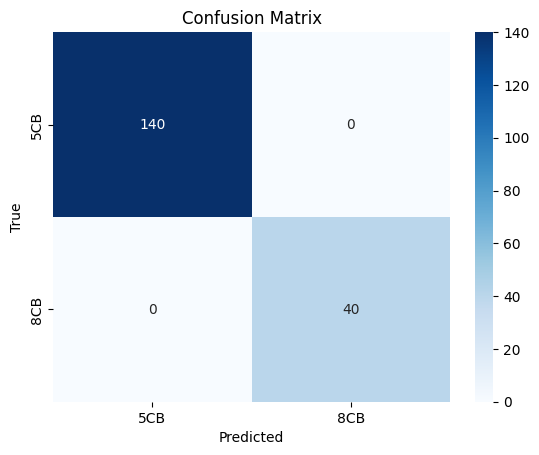

In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
data_dir = "/kaggle/working/binary-classification-dataset"

# Transforms
transform = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
}

# Datasets
datasets_dict = {
    split: datasets.ImageFolder(os.path.join(data_dir, split), transform=transform[split])
    for split in ['train', 'val', 'test']
}

class_names = datasets_dict['train'].classes
print("Classes:", class_names)

# Compute class weights and sampler
label_counts = [0] * len(class_names)
for _, label in datasets_dict['train']:
    label_counts[label] += 1
class_weights = [1.0 / label_counts[label] for _, label in datasets_dict['train']]
sampler = WeightedRandomSampler(class_weights, num_samples=len(class_weights), replacement=True)

# Dataloaders
dataloaders = {
    'train': DataLoader(datasets_dict['train'], batch_size=16, sampler=sampler),
    'val': DataLoader(datasets_dict['val'], batch_size=16, shuffle=False),
    'test': DataLoader(datasets_dict['test'], batch_size=16, shuffle=False)
}

# Model
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)
model.device = device

# Loss and Optimizer with optional class weights
weights_tensor = torch.tensor([1.0 / label_counts[0], 1.0 / label_counts[1]], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training Loop
def train_model(model, epochs=20):
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        train_loss, correct = 0, 0

        for images, labels in dataloaders['train']:
            images, labels = images.to(model.device), labels.to(model.device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(output, 1)
            correct += (preds == labels).sum().item()

        val_acc = evaluate_model(model, 'val')
        print(f"Train Loss: {train_loss:.4f} | Train Acc: {correct/len(datasets_dict['train']):.4f} | Val Acc: {val_acc:.4f}")

# Evaluation Function
def evaluate_model(model, split):
    model.eval()
    correct = 0
    with torch.no_grad():
        for images, labels in dataloaders[split]:
            images, labels = images.to(model.device), labels.to(model.device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
    return correct / len(datasets_dict[split])

# Train
train_model(model, epochs=20)

# Test Function
def test_model(model):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in dataloaders['test']:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu())
            all_labels.extend(labels.cpu())

    print("\nTest Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    print("F1 Score (macro):", f1_score(all_labels, all_preds, average='macro'))

    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap="Blues", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Run test
test_model(model)



In [18]:
# Training Loop
def train_model(model, epochs=20):
    train_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        train_loss, correct = 0, 0

        for images, labels in dataloaders['train']:
            images, labels = images.to(model.device), labels.to(model.device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(output, 1)
            correct += (preds == labels).sum().item()

        avg_train_loss = train_loss / len(dataloaders['train'])
        val_acc = evaluate_model(model, 'val')

        train_losses.append(avg_train_loss)
        val_accuracies.append(val_acc)

        print(f"Train Loss: {avg_train_loss:.4f} | Train Acc: {correct/len(datasets_dict['train']):.4f} | Val Acc: {val_acc:.4f}")

    return train_losses, val_accuracies



In [19]:
train_losses, val_accuracies = train_model(model, epochs=20)




Epoch 1/20
Train Loss: 0.0019 | Train Acc: 0.9982 | Val Acc: 1.0000

Epoch 2/20
Train Loss: 0.0001 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 3/20
Train Loss: 0.0001 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 4/20
Train Loss: 0.0002 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 5/20
Train Loss: 0.0001 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 6/20
Train Loss: 0.0000 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 7/20
Train Loss: 0.0000 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 8/20
Train Loss: 0.0000 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 9/20
Train Loss: 0.0638 | Train Acc: 0.9883 | Val Acc: 0.9935

Epoch 10/20
Train Loss: 0.0415 | Train Acc: 0.9865 | Val Acc: 1.0000

Epoch 11/20
Train Loss: 0.0021 | Train Acc: 0.9991 | Val Acc: 1.0000

Epoch 12/20
Train Loss: 0.0016 | Train Acc: 0.9991 | Val Acc: 1.0000

Epoch 13/20
Train Loss: 0.0160 | Train Acc: 0.9964 | Val Acc: 0.9935

Epoch 14/20
Train Loss: 0.0013 | Train Acc: 1.0000 | Val Acc: 1.0000

Epoch 15/20
Train Loss: 0.00

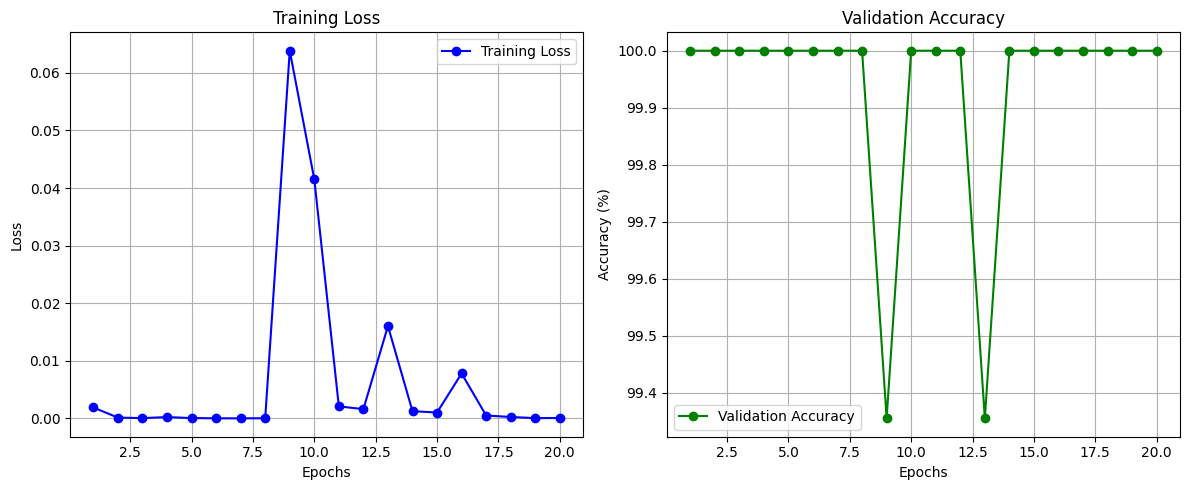

In [20]:
# Plotting training curves
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(epochs_range, train_losses, 'b-o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(epochs_range, [acc*100 for acc in val_accuracies], 'g-o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
